In [1]:
import vipy

In [2]:
# Generate a (256x512) random scene with 32 tracked objects and 32 activities
v = vipy.video.RandomScene(256, 512)

In [3]:
# Visualize the activities in this video by generating an annotation video and playing with the system player
v.annotate().play(notebook=True)

[vipy.video.annotate]: Annotating video ...


/Users/jba3139/dev/vipy/vipy/video.py:1015: UserWarning: Saving video to temporary file "/var/folders/jj/x4chm3n11z1fwj4ylgt091040010bl/T/2374ac095bbbc752.mp4" for notebook viewer ... 
  warnings.warn('Saving video to temporary file "%s" for notebook viewer ... ' % v.filename())


In [4]:
# The activities areavailable as a mutable dictionary keyed by a globally unique activity ID
# The activity is defined over a contiguous start and end frame range, and is associated with one or more tracks
# that are involved with this activity during this time frame
v.activities()

{'ce151f4017a411eb9b1eacde48001122': <vipy.activity: category="activity0", frames=(76,147), tracks=1>,
 'ce15208a17a411eb9b1eacde48001122': <vipy.activity: category="activity1", frames=(51,147), tracks=1>,
 'ce1521a217a411eb9b1eacde48001122': <vipy.activity: category="activity2", frames=(63,148), tracks=1>,
 'ce1522a617a411eb9b1eacde48001122': <vipy.activity: category="activity3", frames=(84,119), tracks=1>,
 'ce1523a017a411eb9b1eacde48001122': <vipy.activity: category="activity4", frames=(97,142), tracks=1>,
 'ce15249a17a411eb9b1eacde48001122': <vipy.activity: category="activity5", frames=(95,103), tracks=1>,
 'ce15259417a411eb9b1eacde48001122': <vipy.activity: category="activity6", frames=(54,126), tracks=1>,
 'ce15268e17a411eb9b1eacde48001122': <vipy.activity: category="activity7", frames=(80,130), tracks=1>,
 'ce15277e17a411eb9b1eacde48001122': <vipy.activity: category="activity8", frames=(97,149), tracks=1>,
 'ce1528a017a411eb9b1eacde48001122': <vipy.activity: category="activity9"

In [5]:
# Tracks are defined by keyframes, with configurable interpolation and boundary handling
v.tracklist()

[<vipy.object.track: category="track0", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.track: category="track1", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.track: category="track2", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.track: category="track3", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.track: category="track4", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.track: category="track5", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.track: category="track6", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.track: category="track7", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.track: category="track8", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.track: category="track9", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.track: category="track10", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.track: category="track11", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.

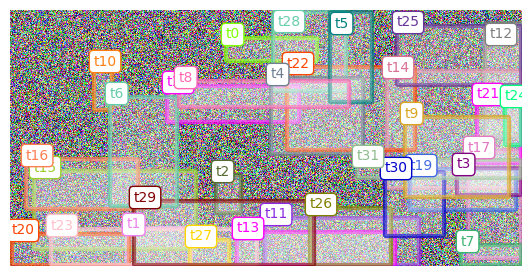

<vipy.image.scene: height=256, width=512, color=rgb, category="scene", objects=32>

In [6]:
# The scene can be indexed by frame, returning a vipy.image.Scene() object
# The image here is just uniform random noise for testing purposes
v[0].show()

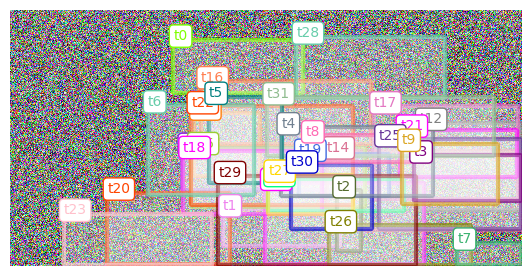

<vipy.image.scene: height=256, width=512, color=rgb, category="scene", objects=32>

In [7]:
# Frame 30 shows that the tracks are moving, this linearly interpolates the tracks at frame 30 
v[30].show()

In [8]:
# The scene can be iterated returning every frame in the video as a vipy.image.Scene() object
frames = [im for im in v]

In [9]:
# Activities can be iterated over to modify them in place by shifting them by 10 frames
v = v.activitymap(lambda a: a.offset(10))

In [10]:
# Activities can be filtered to remove them according to a property, such as minimum length of 10 frames
v = v.activityfilter(lambda a: len(a)>10)

In [11]:
# You can export this to JSON (without the video buffer) for import into other tools
print(v.flush().json())

{"_filename":null,"_url":null,"_framerate":30.0,"_array":null,"_colorspace":"rgb","attributes":{},"_startframe":null,"_endframe":null,"_endsec":null,"_startsec":null,"_ffmpeg":"ffmpeg -i None -filter_complex \"[0]fps=fps=30.0:round=up[s0]\" -map \"[s0]\" dummyfile","_category":"scene","_tracks":{"ce14b21217a411eb9b1eacde48001122":{"_id":"ce14b21217a411eb9b1eacde48001122","_label":"track0","_shortlabel":"t0","_framerate":null,"_interpolation":"linear","_boundary":"strict","attributes":{},"_keyframes":[0,94,150],"_keyboxes":[{"_xmin":215.0,"_ymin":28.0,"_xmax":306.0,"_ymax":51.0},{"_xmin":52.0,"_ymin":33.0,"_xmax":265.0,"_ymax":152.0},{"_xmin":430.0,"_ymin":34.0,"_xmax":478.0,"_ymax":99.0}]},"ce14b74e17a411eb9b1eacde48001122":{"_id":"ce14b74e17a411eb9b1eacde48001122","_label":"track1","_shortlabel":"t1","_framerate":null,"_interpolation":"linear","_boundary":"strict","attributes":{},"_keyframes":[0,69,150],"_keyboxes":[{"_xmin":116.0,"_ymin":218.0,"_xmax":180.0,"_ymax":264.0},{"_xmin":33